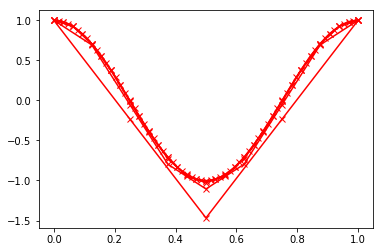

In [22]:
# Arrary and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt

# Number of equally spaced subintervals
N = [4,8,16,32,64]

for j in range(len(N)):
    # Mesh size
    h = 1/N[j] #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
    # Define N+1 grid points via linspace which is part of numpy now aliased as np 
    x = np.linspace(0,1,N[j]+1)
    A = np.zeros((N[j]+1, N[j]+1))

    # Define tridiagonal part of A by for rows 1 to N-1
    for i in range(1, N[j]):
        A[i, i-1] = -1
        A[i, i+1] = -1
        A[i, i] = 2

    F = (h**2)*((2*np.pi)**2)*np.cos(2*np.pi*x)
    
    # Left boundary
    A[0,0] = 1
    F[0] = 1

    # Right boundary
    A[N[j],N[j]] = 1
    F[N[j]] = 1
    
    
    U = la.solve(A, F)
    #  "x-r" means mark data points as "x", connect them by a line and use red color
    plt.plot(x, U, "x-r")